# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Imam Nurcakra
- **Email:** imamnurcakra@gmail.com
- **ID Dicoding:** imamnurcakra

## Menentukan Pertanyaan Bisnis

- Bagaimana perubahan sebaran angin di kota wanliu
- Bagaimana Perubahan kecepatan angin di kota wanliu tiap periode per hari, per 10 hari dan per 10 bulan

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import os

## Data Wrangling

### Gathering Data

In [2]:
# Mount Google Drive if needed
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
!cd drive/MyDrive/
# Destination directory to extract files
to_path = '/content/drive/MyDrive/AirData/'

# Create the destination directory if it doesn't exist
os.makedirs(to_path, exist_ok=True)

In [4]:
import gdown

# Define the Google Drive file URL
file_url = 'https://drive.google.com/uc?id=1RhU3gJlkteaAQfyn9XOVAz7a5o1-etgr'

# Destination directory to save the downloaded file
download_to_path = to_path + '/AirQualityData.zip'

if not os.path.exists(download_to_path):
    # Download the ZIP file
    gdown.download(file_url, download_to_path, quiet=False)
    print()
    print("Download complete.")
else:
    print("ZIP file already exists. Skipping download.")

ZIP file already exists. Skipping download.


In [5]:
# Extract the ZIP file
with zipfile.ZipFile(download_to_path, 'r') as zip_ref:
    zip_ref.extractall(to_path)
    print("Extraction complete.")

Extraction complete.


In [6]:
data = pd.read_csv('/content/drive/MyDrive/AirData/PRSA_Data_20130301-20170228/PRSA_Data_Wanliu_20130301-20170228.csv')

In [7]:
data.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,8.0,8.0,6.0,28.0,400.0,52.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Wanliu
1,2,2013,3,1,1,9.0,9.0,6.0,28.0,400.0,50.0,-1.1,1023.2,-18.2,0.0,N,4.7,Wanliu
2,3,2013,3,1,2,3.0,6.0,NaN,19.0,400.0,55.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Wanliu
3,4,2013,3,1,3,11.0,30.0,8.0,14.0,NaN,NaN,-1.4,1024.5,-19.4,0.0,NW,3.1,Wanliu
4,5,2013,3,1,4,3.0,13.0,9.0,NaN,300.0,54.0,-2.0,1025.2,-19.5,0.0,N,2.0,Wanliu


### Assessing Data

cek missing value

In [11]:
 data.isnull().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       382
PM10        284
SO2         575
NO2        1070
CO         1812
O3         2107
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd          123
WSPM         14
station       0
dtype: int64

*Duplicated data*

In [9]:
data.duplicated().sum()

0

#### Descriptive Statistics

In [12]:
data.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34682.000000,34780.000000,34489.000000,33994.000000,33252.000000,32957.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,83.374716,110.464618,18.376481,65.258789,1319.353513,48.873614,13.428865,1011.097536,3.266588,0.068263,1.501215
std,10122.249256,1.177213,3.448752,8.800218,6.922285,81.905568,92.795065,22.609648,37.996088,1268.114331,55.111740,11.346931,10.355247,13.678060,0.896726,1.104472
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.642400,100.000000,0.214200,-15.800000,985.900000,-34.900000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,40.000000,4.000000,36.000000,500.000000,4.000000,3.200000,1002.500000,-8.100000,0.000000,0.800000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,59.000000,88.000000,10.000000,60.000000,900.000000,32.000000,14.300000,1010.800000,4.000000,0.000000,1.200000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,116.000000,153.000000,23.000000,88.000000,1600.000000,73.000000,22.900000,1019.400000,15.800000,0.000000,2.000000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,957.000000,951.000000,282.000000,264.000000,10000.000000,364.000000,40.500000,1040.300000,28.500000,72.500000,11.200000


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34682 non-null  float64
 6   PM10     34780 non-null  float64
 7   SO2      34489 non-null  float64
 8   NO2      33994 non-null  float64
 9   CO       33252 non-null  float64
 10  O3       32957 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34941 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


*Outliers*

### Cleaning Data

In [14]:
df = data.drop(['station'], axis=1)
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM
0,1,2013,3,1,0,8.0,8.0,6.0,28.0,400.0,52.0,-0.7,1023.0,-18.8,0.0,NNW,4.4
1,2,2013,3,1,1,9.0,9.0,6.0,28.0,400.0,50.0,-1.1,1023.2,-18.2,0.0,N,4.7
2,3,2013,3,1,2,3.0,6.0,NaN,19.0,400.0,55.0,-1.1,1023.5,-18.2,0.0,NNW,5.6
3,4,2013,3,1,3,11.0,30.0,8.0,14.0,NaN,NaN,-1.4,1024.5,-19.4,0.0,NW,3.1
4,5,2013,3,1,4,3.0,13.0,9.0,NaN,300.0,54.0,-2.0,1025.2,-19.5,0.0,N,2.0


In [15]:
df.fillna(method = "ffill", inplace=True)
df.isnull().sum()

No       0
year     0
month    0
day      0
hour     0
PM2.5    0
PM10     0
SO2      0
NO2      0
CO       0
O3       0
TEMP     0
PRES     0
DEWP     0
RAIN     0
wd       0
WSPM     0
dtype: int64

In [16]:
df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM
0,1,2013,3,1,0,8.0,8.0,6.0,28.0,400.0,52.0,-0.7,1023.0,-18.8,0.0,NNW,4.4
1,2,2013,3,1,1,9.0,9.0,6.0,28.0,400.0,50.0,-1.1,1023.2,-18.2,0.0,N,4.7
2,3,2013,3,1,2,3.0,6.0,6.0,19.0,400.0,55.0,-1.1,1023.5,-18.2,0.0,NNW,5.6
3,4,2013,3,1,3,11.0,30.0,8.0,14.0,400.0,55.0,-1.4,1024.5,-19.4,0.0,NW,3.1
4,5,2013,3,1,4,3.0,13.0,9.0,14.0,300.0,54.0,-2.0,1025.2,-19.5,0.0,N,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,11.0,27.0,4.0,20.0,300.0,81.0,12.6,1011.9,-14.3,0.0,N,2.0
35060,35061,2017,2,28,20,15.0,43.0,6.0,55.0,500.0,45.0,9.4,1012.3,-11.9,0.0,WSW,1.0
35061,35062,2017,2,28,21,13.0,35.0,7.0,48.0,500.0,48.0,8.7,1012.8,-13.7,0.0,N,1.1
35062,35063,2017,2,28,22,12.0,31.0,5.0,47.0,500.0,50.0,7.8,1012.9,-12.6,0.0,NNE,1.0


## Exploratory Data Analysis (EDA)

##### Persebaran arah angin di wanliu

In [18]:
df["wind_direction"]= df["wd"]
wind_direction_df = df[['wind_direction', 'wd']].copy()
wind_direction_df = wind_direction_df.groupby(by="wind_direction").agg({"wd": "count"}).sort_values(by="wd", ascending=False).reset_index()
wind_direction_df = wind_direction_df.rename(columns = {'wd' : 'jumlah'})
wind_direction_df['percent'] = round((wind_direction_df['jumlah'] / wind_direction_df['jumlah'].sum()) * 100, 2)
wind_direction_df

,wind_direction,jumlah,percent
0,NE,6740,19.22
1,SW,4679,13.34
2,ENE,3643,10.39
3,NNE,3333,9.51
4,N,3223,9.19
5,WSW,2535,7.23
6,SSW,2105,6.00
7,NNW,1398,3.99
8,W,1336,3.81
9,E,1265,3.61


## Kecepatan angin di Wanliu


*   Selama 24 jam pada tanggal 2013-03-01 00.00-19.00 (20 data pertama)
*   Selama 10 hari pada tanggal 2013-03-01 sampai 2013-03-10 (10 data pertama)
*   Selama 10 bulan pada tanggal 2013-03 sampai 2013-10 (10 data pertama)



##### Kecepatan angin selama sehari jam tanggal 2013-03-01 00.00-23.00

In [23]:

wind_speed_hour = df.groupby(by = ['year', 'month', 'day','hour'] ).agg({
            "WSPM" : "mean"}).sort_values(by = ['year', 'month', 'day','hour'], ascending = True)
wind_speed_hour = wind_speed_hour.reset_index()
wind_speed_hour['time'] = wind_speed_hour["hour"].astype(str) + ":00"
wind_speed_hour.head(24)

,year,month,day,hour,WSPM,time
0,2013,3,1,0,4.4,0:00
1,2013,3,1,1,4.7,1:00
2,2013,3,1,2,5.6,2:00
3,2013,3,1,3,3.1,3:00
4,2013,3,1,4,2.0,4:00
5,2013,3,1,5,3.7,5:00
6,2013,3,1,6,2.5,6:00
7,2013,3,1,7,3.8,7:00
8,2013,3,1,8,4.1,8:00
9,2013,3,1,9,2.6,9:00


##### Kecepatan angin selama 10 hari tanggal 2013-03-01 - 2013-03-10

In [57]:
wind_speed_day = df.groupby(by = ['year', 'month', 'day'] ).agg({
            "WSPM" : "mean"}).sort_values(by = ['year', 'month', 'day'], ascending = True)
wind_speed_day = wind_speed_day.reset_index()
wind_speed_day['time'] = wind_speed_day["year"].astype(str) + "-" + wind_speed_day["month"].astype(str) + "-" + wind_speed_day["day"].astype(str)
wind_speed_day.head(10)

,year,month,day,WSPM,time
0,2013,3,1,3.254167,2013-3-1
1,2013,3,2,1.479167,2013-3-2
2,2013,3,3,1.658333,2013-3-3
3,2013,3,4,2.404167,2013-3-4
4,2013,3,5,1.129167,2013-3-5
5,2013,3,6,1.483333,2013-3-6
6,2013,3,7,1.558333,2013-3-7
7,2013,3,8,1.637500,2013-3-8
8,2013,3,9,3.391667,2013-3-9
9,2013,3,10,2.441667,2013-3-10


##### Kecepatan angin selama 10 bulan tanggal 2013-03 - 2013-12


In [60]:
wind_speed_month = df.groupby(by = ['year', 'month'] ).agg({
            "WSPM" : "mean"}).sort_values(by = ['year', 'month'], ascending = True)
wind_speed_month = wind_speed_month.reset_index()
wind_speed_month['time'] = wind_speed_month["year"].astype(str) + "-" + wind_speed_month["month"].astype(str)
wind_speed_month.head(10)

,year,month,WSPM,time
0,2013,3,1.997849,2013-3
1,2013,4,2.209722,2013-4
2,2013,5,1.740457,2013-5
3,2013,6,1.240000,2013-6
4,2013,7,1.278763,2013-7
5,2013,8,1.296909,2013-8
6,2013,9,1.134028,2013-9
7,2013,10,1.169624,2013-10
8,2013,11,1.633056,2013-11
9,2013,12,1.629973,2013-12


## Visualization & Explanatory Analysis

### Pertanyaan 1:
Bagaimana perubahan persebaran arah angin di wanliu

<ipython-input-43-99ced1d96fd1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data= data, x= data['percent'], y= data['wind_direction'], palette= 'plasma', ax= ax, orient= 'h')


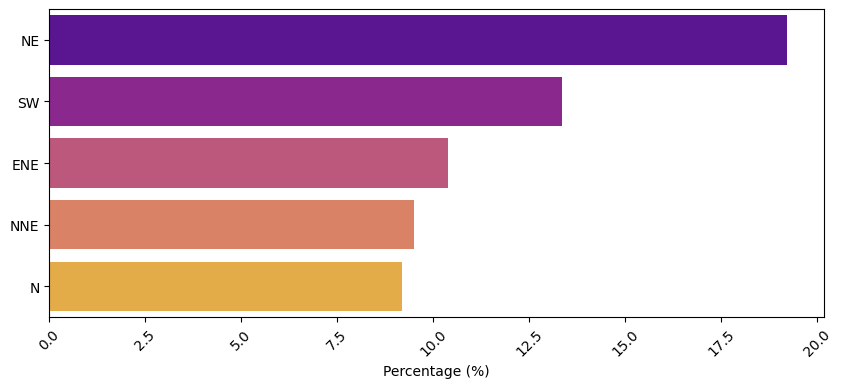

In [43]:
def arah_angin(data):
    fig, ax = plt.subplots(figsize=(10, 4))
    sns.barplot(data= data, x= data['percent'], y= data['wind_direction'], palette= 'plasma', ax= ax, orient= 'h')
    ax.tick_params(axis='y' )
    ax.tick_params(axis='x',  labelrotation = 45)
    ax.set_ylabel(None)
    ax.set_xlabel("Percentage (%)")
    plt.show()

arah_angin(wind_direction_df.head(5))

### Pertanyaan 2:

Bagaimana Perubahan kecepatan angin di kota wanliu tiap periode per hari, per 10 hari dan per 10 bulan

In [54]:
def kecepatan_angin(df):
    fig, ax = plt.subplots(figsize=(10, 4))
    ax.plot(df['time'], df['WSPM'], marker='o', linewidth=2, color="#BD1266")
    ax.tick_params(axis='y', )
    ax.tick_params(axis='x',  labelrotation = 45)
    ax.set_ylabel("Kecepatan angin(m/s)")
    ax.set_title("kecepatan angin", loc="center")
    plt.show()

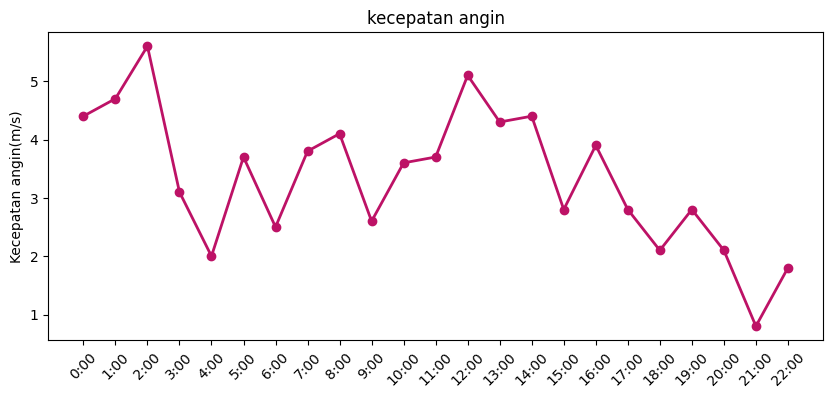

In [55]:
kecepatan_angin(wind_speed_hour.head(23))

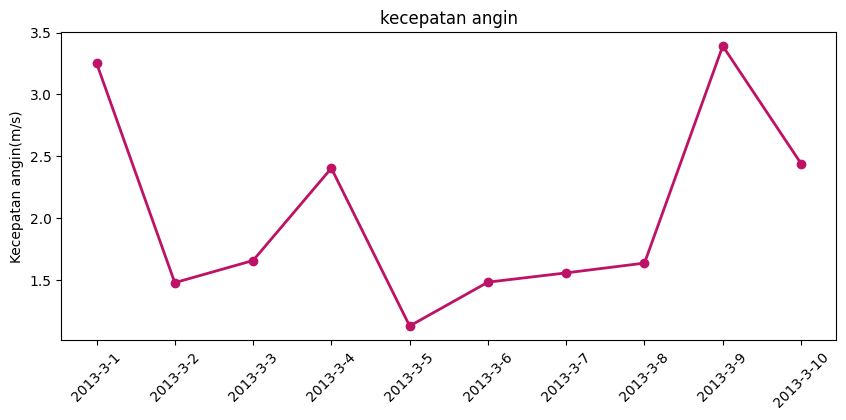

In [58]:
kecepatan_angin(wind_speed_day.head(10))


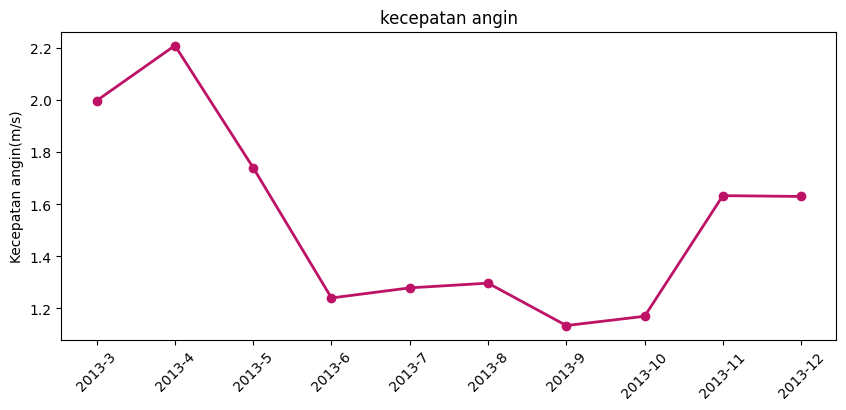

In [61]:
kecepatan_angin(wind_speed_month.head(10))


## Conclusion

- Conclution pertanyaan 1
- Conclution pertanyaan 2